1. 梯度消失和梯度爆炸
    * 梯度消失：参数更新过小，在每次更新时几乎不会移动，导致无法学习。
    * 梯度爆炸：参数更新过大，破坏了模型的稳定收敛；
2. 参数初始化
    * 默认初始化：使用正态分布来初始化权重值
    * Xavier初始化:它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。
    
    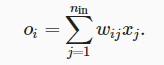
    
    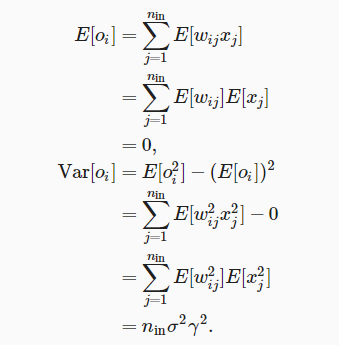
    保持方差不变的一种方法是设置 n in*σ2=1 ，同时反向传播当中n out *σ2=1，需要同时满足：
    
    方差的性质：
    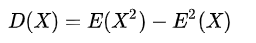
    
    期望方差换算公式
    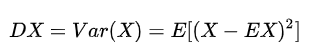
    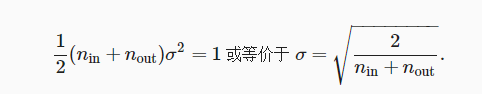
    
    均匀分布二阶中心矩
    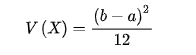
    
    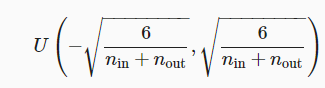
    
    * 额外内容：上面的推理仅仅触及了现代参数初始化方法的皮毛，可以更深入研究初始化方法
3. 小结

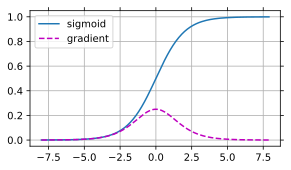

In [1]:
# 梯度消失

%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x) # sigmoid 1/(1+exp(−x)) 
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))



In [3]:
# 梯度爆炸

M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.0053, -0.0376, -1.2510,  1.0195],
        [-0.6776, -0.1193, -2.4170,  0.7763],
        [ 0.9203, -1.1621,  1.6492,  0.2717],
        [ 0.4867, -0.7255, -0.4282,  0.5086]])
乘以100个矩阵后
 tensor([[ 9.9135e+25,  4.3152e+25,  5.3968e+26,  9.3120e+25],
        [ 1.5067e+26,  6.5584e+25,  8.2022e+26,  1.4153e+26],
        [-2.6789e+26, -1.1661e+26, -1.4584e+27, -2.5164e+26],
        [-8.2938e+25, -3.6102e+25, -4.5151e+26, -7.7907e+25]])


In [2]:
torch.normal(0, 1, size=(4,4))

tensor([[-0.3527, -0.6130, -0.2844, -0.2931],
        [-0.8395,  0.5647,  1.0473,  0.1489],
        [ 1.0086,  0.1314,  0.6151,  0.3297],
        [-0.4016, -2.0622,  1.2722, -0.9167]])